In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key
import time


In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | angoram
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | garden city
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | meyungs
City not found. Skipping...
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | de-kastri
Processing Record 12 of Set 1 | viedma
Processing Record 13 of Set 1 | dibaya
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | maine-soroa
Processing Record 18 of Set 1 | batemans bay
Processing Record 19 of Set 1 | merrill
Processing Record 20 of Set 1 | gorin
Processing Record 21 of Set 1 | luderitz
Processing Record 22 of Set 1 | kharovsk

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-19.97,53,49,9.08,GL,2021-03-26 06:25:27
1,Angoram,-4.0625,144.0661,84.15,83,96,4.12,PG,2021-03-26 06:25:27
2,Garden City,42.3256,-83.3310,46.00,93,90,11.50,US,2021-03-26 06:25:28
3,Arraial Do Cabo,-22.9661,-42.0278,75.16,84,2,4.23,BR,2021-03-26 06:25:28
4,Cape Town,-33.9258,18.4232,69.01,77,75,18.41,ZA,2021-03-26 06:21:54
5,Cidreira,-30.1811,-50.2056,73.13,91,34,12.97,BR,2021-03-26 06:25:29
6,Punta Arenas,-53.1500,-70.9167,46.40,61,0,14.97,CL,2021-03-26 06:24:22
7,Norman Wells,65.2820,-126.8329,15.80,62,75,2.30,CA,2021-03-26 06:25:29
8,De-Kastri,51.4667,140.7833,29.32,82,100,3.65,RU,2021-03-26 06:25:29
9,Viedma,-40.8135,-62.9967,51.93,72,94,5.19,AR,2021-03-26 06:25:30


In [12]:
clean_city_data_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[clean_city_data_df]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-03-26 06:25:27,77.4840,-69.3632,-19.97,53,49,9.08
1,Angoram,PG,2021-03-26 06:25:27,-4.0625,144.0661,84.15,83,96,4.12
2,Garden City,US,2021-03-26 06:25:28,42.3256,-83.3310,46.00,93,90,11.50
3,Arraial Do Cabo,BR,2021-03-26 06:25:28,-22.9661,-42.0278,75.16,84,2,4.23
4,Cape Town,ZA,2021-03-26 06:21:54,-33.9258,18.4232,69.01,77,75,18.41
5,Cidreira,BR,2021-03-26 06:25:29,-30.1811,-50.2056,73.13,91,34,12.97
6,Punta Arenas,CL,2021-03-26 06:24:22,-53.1500,-70.9167,46.40,61,0,14.97
7,Norman Wells,CA,2021-03-26 06:25:29,65.2820,-126.8329,15.80,62,75,2.30
8,De-Kastri,RU,2021-03-26 06:25:29,51.4667,140.7833,29.32,82,100,3.65
9,Viedma,AR,2021-03-26 06:25:30,-40.8135,-62.9967,51.93,72,94,5.19


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

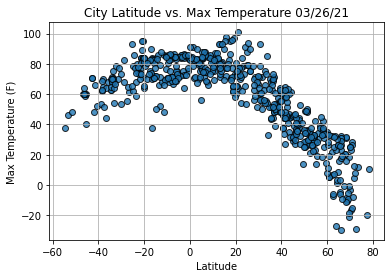

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

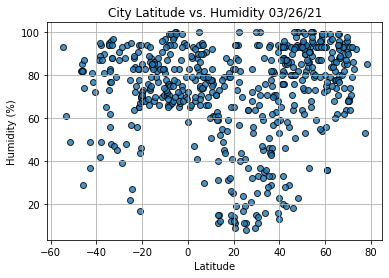

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

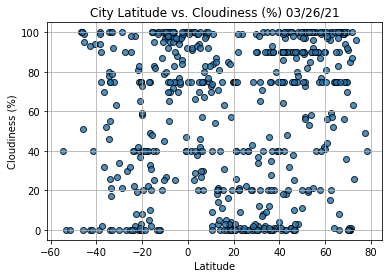

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

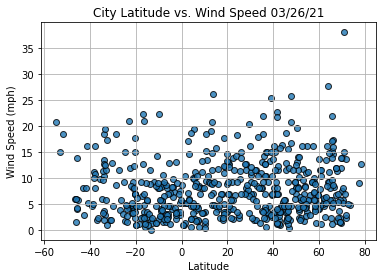

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [105]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [23]:
index13 = city_data_df.loc[13]
index13

City                  Maine-Soroa
Country                        NE
Date          2021-03-26 06:25:31
Lat                       13.2114
Lng                       12.0241
Max Temp                    71.67
Humidity                       11
Cloudiness                     71
Wind Speed                  14.74
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2021-03-26 06:25:27,77.4840,-69.3632,-19.97,53,49,9.08
2,Garden City,US,2021-03-26 06:25:28,42.3256,-83.3310,46.00,93,90,11.50
7,Norman Wells,CA,2021-03-26 06:25:29,65.2820,-126.8329,15.80,62,75,2.30
8,De-Kastri,RU,2021-03-26 06:25:29,51.4667,140.7833,29.32,82,100,3.65
11,Talnakh,RU,2021-03-26 06:25:30,69.4865,88.3972,18.21,91,100,11.95


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

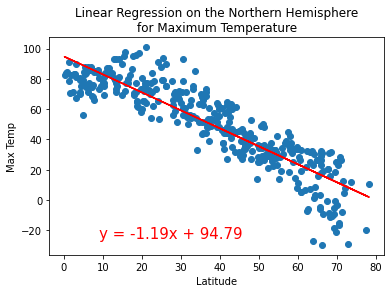

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                       'for Maximum Temperature', 'Max Temp',(9,-25))

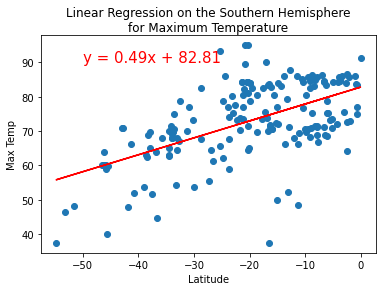

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for Maximum Temperature', 'Max Temp',(-50,90))


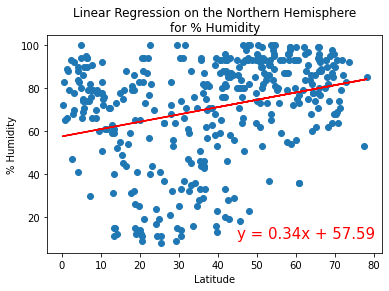

In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for % Humidity', '% Humidity',(45,10))

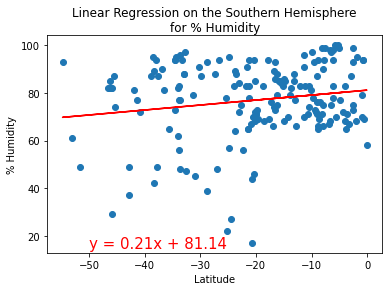

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for % Humidity', '% Humidity',(-50,15))


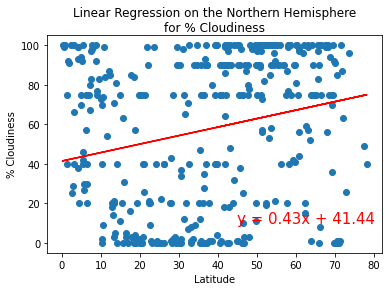

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for % Cloudiness', '% Cloudiness',(45,10))

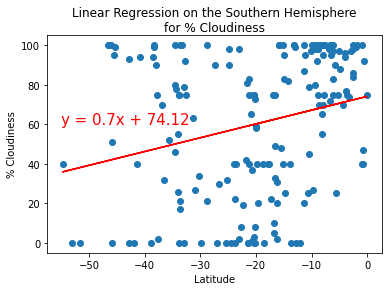

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' '\n'
                        'for % Cloudiness', '% Cloudiness',(-55,60))

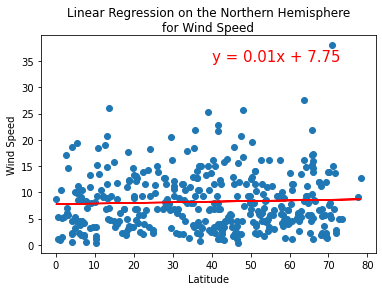

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' '\n'
                        'for Wind Speed', 'Wind Speed',(40,35))

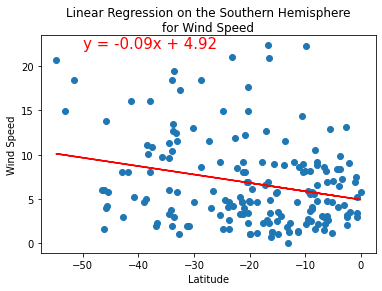

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere' '\n' 
                        'for Wind Speed' , 'Wind Speed',(-50,22))